# Creating EEG Objects

## Epoch Creation
<a id="intro"></a>

In [1]:
from simpl_eeg import eeg_objects

In [2]:
import warnings
warnings.filterwarnings('ignore')

```{note}
Please include the line below in your IDE so that the changes would be simultaneously reflected when you make a change to the python scripts.**
```

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

<br>

### Module Overview

The `eeg_objects` module contains helper classes for storing and manipulating relevant information regarding epochs to pass to other package functions. It contains two classes. Typically you will only you use the `eeg_objects.Epochs` directly, which by default contains a `eeg_objects.EEG_File` object in the `eeg_file` attribute. 
Below are the docstrings for the two classes:

In [5]:
# Class for reading and importing EEG files
?eeg_objects.EEG_File

In [6]:
# Class for storing, generating, and adjusting epoch objects
?eeg_objects.Epochs

<br>

### Define parameters

The only required parameter to create an epoch object is the `folder_path` for the experiment of interest, however additional parameters may be used to customize your epoch object. 

- If you specify a `start_second`, a single epoch will be generated with an impact event at the specified second. 

- If you do not specify a `start_second`, epochs will be automatically generated using the impact times found in the `impact locations.mat` file in the selected `experiment_folder`. 

- `tmin` specifies the number of seconds before the impact to use, and `tmin` specifies the number of seconds after the impact.

In [7]:
experiment_folder = "../../data/109" # path to the experiment folder
tmin = -1  # number of seconds before the impact, should be a negative number for before impact
tmax = 1  # number of seconds after the impact
start_second = None  # if creating a custom epoch, select a starting second

<br>

### Create epoched data

You can create epoched data using the `Epochs` class.

In [8]:
epochs = eeg_objects.Epochs(experiment_folder, tmin, tmax, start_second)

Reading /Users/sasha/mds/simpl_eeg_capstone/data/109/fixica.fdt


Not setting metadata


Not setting metadata


33 matching events found


Setting baseline interval to [-1.0, 0.0] sec


Applying baseline correction (mode: mean)


0 projection items activated


Loading data for 33 events and 4097 original time points ...


0 bad epochs dropped


The generated epoch data is found within the `data` attribute. Here we are generating epochs with automatically detected impact times, so we can see that there are multiple events.

In [9]:
epochs.data

Number of events,33
Events,1027 seconds: 11138 seconds: 11253 seconds: 11370 seconds: 11585 seconds: 11697 seconds: 11812 seconds: 11935 seconds: 12055 seconds: 12219 seconds: 12363 seconds: 12472 seconds: 12594 seconds: 12713 seconds: 12898 seconds: 13033 seconds: 13150 seconds: 13269 seconds: 13389 seconds: 13518 seconds: 13628 seconds: 13774 seconds: 13945 seconds: 14061 seconds: 14180 seconds: 14319 seconds: 14463 seconds: 14662 seconds: 14785 seconds: 14906 seconds: 15029 seconds: 1735 seconds: 1892 seconds: 1
Time range,-1.000 – 1.000 sec
Baseline,-1.000 – 0.000 sec


If instead we create epochs with a custom start second, we will only create a single epoch with an impact the given `start_second`.

In [10]:
start_second = 15  # record event at second 15
custom_epoch = eeg_objects.Epochs(experiment_folder, tmin, tmax, start_second) 

custom_epoch.data

Reading /Users/sasha/mds/simpl_eeg_capstone/data/109/fixica.fdt


Not setting metadata


Not setting metadata


1 matching events found


Setting baseline interval to [-1.0, 0.0] sec


Applying baseline correction (mode: mean)


0 projection items activated


Loading data for 1 events and 4097 original time points ...


0 bad epochs dropped


Number of events,1
Events,15 seconds: 1
Time range,-1.000 – 1.000 sec
Baseline,-1.000 – 0.000 sec


#### Get information about epochs

In addition to the epochs contained in the `data` attribute, the `Epoch` object also contains information about the file used and has a selected epoch for quick access. 

In [11]:
eeg_file = epochs.eeg_file
print(eeg_file.folder_path)  # experiment folder path
print(eeg_file.experiment)  # experiment number
print(eeg_file.mat)  # impact times
print(eeg_file.raw)  # raw data

../../data/109
109


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 23 17:21:01 2021', '__version__': '1.0', '__globals__': [], 'baselocs': array([[   27722, 10544897]], dtype=int32), 'elecmax1': array([[ 1506127,  1828393,  2103572,  2332113,  2566359,  2806427,
         3246204,  3475576,  3712770,  3963481,  4208934,  4544740,
         4840659,  5064290,  5314417,  5557193,  5936062,  6213199,
         6451715,  6695044,  6941686,  7206205,  7431075,  7731054,
         8080362,  8317857,  8562682,  8847325,  9142217,  9549010,
         9801198, 10049013, 10301077]], dtype=int32)}
<RawEEGLAB | fixica.fdt, 19 x 11175225 (5456.7 s), ~30 kB, data not loaded>


#### Select specific epoch

If you have a specific epoch of interest you can specify it with the `set_nth_epoch` method. Then to retrieve that epoch use `get_nth_epoch`

In [12]:
nth_epoch = 5  # the epoch of interest to select, the 6th impact
epochs.set_nth_epoch(nth_epoch)

In [13]:
single_epoch = epochs.get_nth_epoch()
single_epoch

Number of events,1
Events,1370 seconds: 1
Time range,-1.000 – 1.000 sec
Baseline,-1.000 – 0.000 sec


#### Decimate the epoch (optional)

To reduce the size of the selected epoch you can choose to skip a selected number of time steps by calling the `skip_n_steps` method. This will only be run on the current selected epoch from the previous step, contained in the `epoch` attribute.

Skipping steps will greatly reduce animation times for the other functions in the package. The greater the number of steps skipped, the fewer the frames to animate. In the example below we are reducing the selected epoch from 4097 time steps to 81 time steps. 

In [14]:
single_epoch.get_data().shape

(1, 19, 4097)

In [15]:
num_steps = 50
smaller_epoch = epochs.skip_n_steps(num_steps)
smaller_epoch.get_data().shape

(1, 19, 81)

### MNE functions

Now that you have access epoched data, you can use the `simpl_eeg` package functions as well as any [MNE functions](https://mne.tools/stable/generated/mne.Epochs.html) which act on `mne.epoch` objects. Below are some useful examples for the MNE objects contained within the object we created. 

#### Raw data
https://mne.tools/stable/generated/mne.io.Raw.html

In [16]:
raw = epochs.eeg_file.raw
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, T3, T5, F3, C3, P3, Fz, Cz, Pz, F4, C4, P4, F8, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 0.0 Hz
 lowpass: 1024.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 2048.0 Hz
>

Effective window size : 1.000 (s)


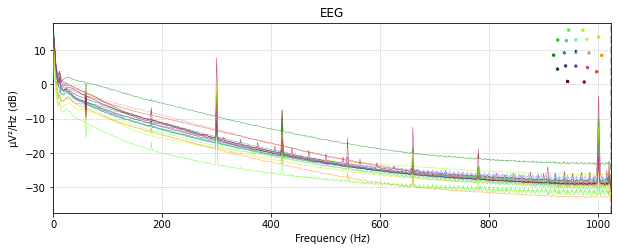

In [17]:
raw.plot_psd();

#### Epoch data

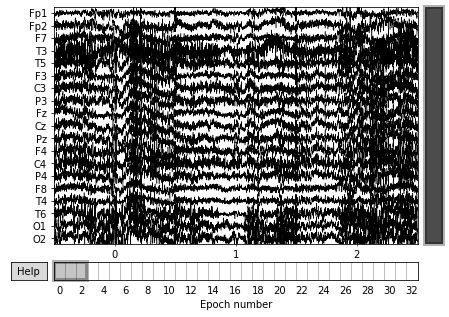

In [18]:
# first 3 epochs
epochs.data.plot(n_epochs=3);

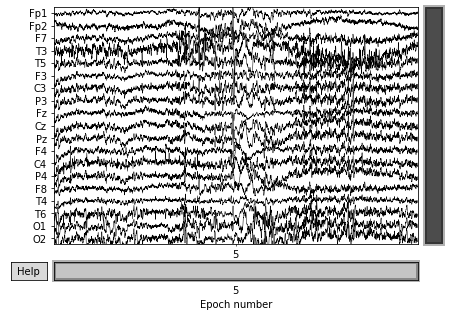

In [19]:
# specific epoch
epochs.get_nth_epoch().plot();  # alternatively you could call epochs.epoch directly

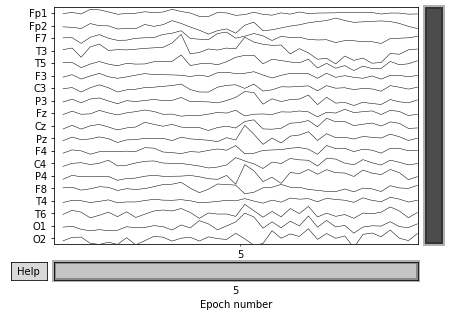

In [20]:
# specific epoch with steps skipped
epochs.skip_n_steps(100).plot();